In [1]:
import geemap
import ee
import geopandas as gpd

In [2]:
ee.Authenticate()


True

In [4]:
#create map
m = geemap.Map()

# Set the zoom point to Kenya
m.setCenter(37.9062, -0.0236, 6)  # Longitude, Latitude, Zoom level

# Display the map
m

Map(center=[-0.0236, 37.9062], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [5]:
co_dataset = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CO').select('CO_column_number_density').filterDate('2020-01-01', '2021-01-01').mean()

band_viz = {
  'min': 0,
  'max': 0.05,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

m.addLayer(co_dataset, band_viz, 'S5P CO')


In [29]:
no2_dataset = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2') \
.select('tropospheric_NO2_column_number_density') \
.filterDate('2020-01-01', '2021-01-01')

band_viz = {
    "min": 0,
    "max": 0.0002,
    "palette": ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

m.addLayer(no2_dataset.mean(), band_viz, 'S5P N02')

In [5]:
kenya_counties = gpd.read_file('data/geospatial/kenyan-counties.geojson')
kenya_counties.columns

Index(['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [7]:
#export as  shapefile and zip it
selected_columns.to_file("data/geospatial/kenyan-counties.shp")

In [17]:
#load subcounties
kenya_subcounties = gpd.read_file('data/geospatial/kenya-subcounties-simplified.geojson')

In [22]:
kenya_subcounties.columns

Index(['Shape_Leng', 'Shape_Area', 'shapeName', 'Level', 'shapeID',
       'shapeGroup', 'shapeType', 'geometry'],
      dtype='object')

In [25]:
#export as  shapefile
kenya_subcounties.to_file("data/geospatial/kenya-subcounties.shp")

In [24]:
selected_subcounties = kenya_subcounties[["shapeName", "geometry"]]

In [10]:
asset_path = 'projects/ee-heat-001/assets/kenyan-counties'
kenya_counties = ee.FeatureCollection(asset_path)

In [11]:
#add as layer
m.addLayer(kenya_counties, {}, 'Kenyan Counties')

In [12]:
# #compute zonal stats
output_file = 'data/computed_stats/kenya_co_stats.csv'

geemap.zonal_stats(co_dataset, kenya_counties, output_file,stat_type="MEAN",scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_co_stats.csv


In [26]:
asset_path_sub='projects/ee-heat-001/assets/kenya-subcounties'
kenya_subcounties = ee.FeatureCollection(asset_path_sub)

In [27]:
#use to compute zonal stats
output_file_sub = 'data/computed_stats/kenya_co_stats_sub.csv'
geemap.zonal_stats(co_dataset, kenya_subcounties, output_file_sub,stat_type="MEAN",scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_co_stats_sub.csv


In [28]:
geemap.csv_to_df(output_file_sub).head()

,mean,Shape_Leng,shapeGroup,shapeType,shapeID,Shape_Area,Level,shapeName,system:index
0,0.024584,1.746986,KEN,ADM2,KEN-ADM2-3690345B56101260,0.040829,ADM2,Ainabkoi,00000000000000000000
1,0.027296,0.917307,KEN,ADM2,KEN-ADM2-3690345B87011697,0.019957,ADM2,Ainamoi,00000000000000000001
2,0.028365,1.402637,KEN,ADM2,KEN-ADM2-3690345B66326805,0.038000,ADM2,Aldai,00000000000000000002
3,0.031679,1.081354,KEN,ADM2,KEN-ADM2-3690345B40354507,0.049357,ADM2,Alego Usonga,00000000000000000003
4,0.029916,0.743915,KEN,ADM2,KEN-ADM2-3690345B85995800,0.021365,ADM2,Awendo,00000000000000000004


In [30]:
output_file_no2 = 'data/computed_stats/kenya_no2_stats.csv'
geemap.zonal_stats(no2_dataset.mean(), kenya_counties, output_file_no2, stat_type="MEAN", scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_no2_stats.csv


In [31]:
geemap.csv_to_df(output_file_no2).head()

,mean,system:index,COUNTY
0,0.000007,00000000000000000000,Turkana
1,0.000007,00000000000000000001,Marsabit
2,0.000005,00000000000000000002,Mandera
3,0.000006,00000000000000000003,Wajir
4,0.000006,00000000000000000004,West Pokot


In [32]:
output_file_no2_sub = 'data/computed_stats/kenya_no2_stats_sub.csv'
geemap.zonal_stats(no2_dataset.mean(), kenya_subcounties, output_file_no2_sub, stat_type="MEAN", scale=1000, return_fc=False)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /workspaces/air-quality-monitor/data/computed_stats/kenya_no2_stats_sub.csv


In [8]:
africa_fc = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(
    ee.Filter.eq("wld_rgn", "Africa")
)

In [12]:
import ee
import geemap
import datetime
import pandas as pd

# Initialize the Earth Engine API
ee.Initialize()

# Define the date range
start_date = '2018-06-28'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Load the NO2 dataset
no2_dataset = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')

# Load the African countries shapefile
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
african_countries = countries.filter(ee.Filter.eq('wld_rgn', 'Africa'))

# Define the function to compute monthly averages
def compute_monthly_no2_averages(start_date, end_date):
    # Define the date range
    start = ee.Date(start_date)
    end = ee.Date(end_date)
    
    # Generate a list of months
    months = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m").tolist()

    all_stats = []

    for month in months:
        month_start = ee.Date(f'{month}-01')
        month_end = month_start.advance(1, 'month')
        
        # Filter the NO2 dataset for the month and select the band
        monthly_no2 = no2_dataset.filterDate(month_start, month_end).select('NO2_column_number_density').mean()
        
        # Ensure the image has the band
        if monthly_no2.bandNames().size().getInfo() == 0:
            print(f"No data for {month}")
            continue
        
        # Compute the zonal statistics for each country
        stats = geemap.zonal_stats(
            monthly_no2, 
            african_countries, 
            None,  # No need to save intermediate files
            stat_type='MEAN', 
            scale=1000, 
            return_fc=True
        )
        
        # Convert the results to a DataFrame and add the month column
        df = geemap.ee_to_df(stats)
        df['month'] = month
        all_stats.append(df)
    
    # Concatenate all monthly DataFrames into a single DataFrame
    final_df = pd.concat(all_stats, ignore_index=True)
    
    # Save the final DataFrame to a CSV file
    final_output_file = 'data/computed_stats/african_countries_no2_monthly.csv'
    final_df.to_csv(final_output_file, index=False)
    
    return final_output_file

# Compute the monthly NO2 averages
final_output_file = compute_monthly_no2_averages(start_date, end_date)
print(f'Monthly NO2 averages saved to {final_output_file}')

Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...
Computing statistics ...


In [15]:
results = geemap.csv_to_df(final_output_file)

In [16]:
#how many months in the dataset
results['month'].nunique()

76

<Axes: >

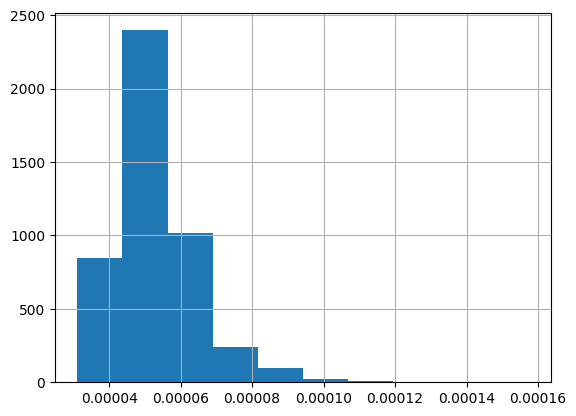

In [18]:
#histogram of the NO2 values
results['mean'].hist()